<a href="https://colab.research.google.com/github/neetimag/Models/blob/main/Sound_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()
! mkdir ~/.kaggle
#  Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/
# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 418M/429M [00:03<00:00, 131MB/s]
100% 429M/429M [00:03<00:00, 127MB/s]


In [4]:
#@title
#ls

In [5]:
!mkdir SER

In [6]:
!unzip ravdess-emotional-speech-audio.zip -d SER

Archive:  ravdess-emotional-speech-audio.zip
  inflating: SER/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: SER/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: SER/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: SER/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: SER/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-03-02-01-01-01.wav  
  inflating: SER/Actor_01/03-01-03-02-01-02-01.wav  
 

In [7]:
import pandas as pd


In [8]:
df=pd.DataFrame()

In [9]:
import os
for f in os.listdir("SER"):
  print(f)
  if(f!="audio_speech_actors_01-24"):
    for i in os.listdir("SER/"+f):
      k=i.split(".")[0] 
      k=k.split("-") 
      emotion=k[2]
      rep=k[5]
      if(int(k[6])%2==0):
        gender=1 #female
      else:
        gender=0 #male
      
      #if(rep!='02'):
      ls=[[i,gender,emotion]]
      df=df.append(ls,ignore_index=True)
      print(k)
      print(emotion,rep,gender)
      

Actor_01
['03', '01', '02', '01', '01', '02', '01']
02 02 0
['03', '01', '05', '02', '02', '02', '01']
05 02 0
['03', '01', '02', '02', '01', '02', '01']
02 02 0
['03', '01', '04', '02', '02', '01', '01']
04 01 0
['03', '01', '08', '01', '01', '01', '01']
08 01 0
['03', '01', '08', '02', '02', '01', '01']
08 01 0
['03', '01', '02', '02', '02', '01', '01']
02 01 0
['03', '01', '03', '02', '01', '01', '01']
03 01 0
['03', '01', '04', '01', '02', '01', '01']
04 01 0
['03', '01', '01', '01', '02', '01', '01']
01 01 0
['03', '01', '04', '02', '01', '01', '01']
04 01 0
['03', '01', '07', '02', '02', '02', '01']
07 02 0
['03', '01', '05', '01', '01', '02', '01']
05 02 0
['03', '01', '06', '01', '02', '01', '01']
06 01 0
['03', '01', '04', '01', '02', '02', '01']
04 02 0
['03', '01', '07', '01', '02', '02', '01']
07 02 0
['03', '01', '02', '02', '01', '01', '01']
02 01 0
['03', '01', '01', '01', '02', '02', '01']
01 02 0
['03', '01', '07', '01', '01', '01', '01']
07 01 0
['03', '01', '06', '02

In [10]:
df.columns=['FName','Gender','Emotion']

In [11]:
df

,FName,Gender,Emotion
0,03-01-02-01-01-02-01.wav,0,02
1,03-01-05-02-02-02-01.wav,0,05
2,03-01-02-02-01-02-01.wav,0,02
3,03-01-04-02-02-01-01.wav,0,04
4,03-01-08-01-01-01-01.wav,0,08
...,...,...,...
1435,03-01-01-01-01-01-15.wav,0,01
1436,03-01-06-01-02-02-15.wav,0,06
1437,03-01-03-01-02-02-15.wav,0,03
1438,03-01-04-01-01-01-15.wav,0,04


AxesSubplot(0.125,0.125;0.775x0.755)
06    192
04    192
02    192
07    192
03    192
05    192
08    192
01     96
Name: Emotion, dtype: int64


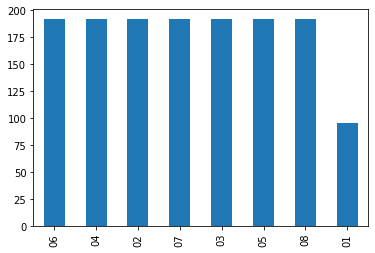

In [12]:
print(df['Emotion'].value_counts().plot(kind = 'bar'))
print(df['Emotion'].value_counts())


In [13]:
import librosa
import numpy as np

In [14]:
df2=pd.DataFrame()

In [15]:
for i in range(len(df)):
  k=df.iloc[i,0]
  n=k.split('-')
  X,sample_rate=librosa.load('/content/SER/Actor_'+n[6].split('.')[0]+'/'+k)
  sample_rate=np.array(sample_rate)
  #mfccs=librosa.feature.mfcc(y=X,n_mfcc=20)
  mfccs=np.mean(librosa.feature.mfcc(y=X,n_mfcc=20),axis=0)
  feature=mfccs
  df2=df2.append([-(feature/100)],ignore_index=True)

In [16]:
df2['Emotion']=df['Emotion']

In [17]:
df2=df2.dropna(axis=1)

In [18]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
0,0.437302,0.417327,0.406924,0.431413,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437233,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.428382,0.437302,0.437302,0.437302,0.423860,0.409053,0.430405,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,0.437302,...,0.243311,0.217103,0.199930,0.209781,0.222545,0.227569,0.218464,0.220857,0.231424,0.243398,0.234559,0.224545,0.230971,0.239176,0.219970,0.205556,0.206591,0.218888,0.223246,0.227728,0.221041,0.220624,0.217599,0.221924,0.235232,0.240137,0.261092,0.259896,0.271910,0.279842,0.289881,0.313752,0.320426,0.329741,0.338099,0.355738,0.373267,0.372165,0.372540,02
1,0.255777,0.256339,0.255866,0.254132,0.253966,0.254433,0.254144,0.253725,0.254183,0.255543,0.256185,0.255678,0.255357,0.256390,0.256978,0.256410,0.258318,0.258917,0.258939,0.258939,0.258939,0.258939,0.258850,0.258399,0.258112,0.258088,0.255949,0.253903,0.253783,0.253968,0.252897,0.250711,0.250359,0.249281,0.246882,0.248720,0.244176,0.227537,0.222106,0.220874,...,0.125550,0.127733,0.142521,0.148359,0.145459,0.156444,0.188742,0.194333,0.208972,0.236508,0.225134,0.230737,0.221534,0.156795,0.140445,0.157904,0.183310,0.172163,0.160676,0.163614,0.147760,0.150816,0.131075,0.071939,0.059298,0.076751,0.083930,0.060214,0.056683,0.065026,0.071571,0.075882,0.114144,0.114488,0.103412,0.125390,0.139136,0.144269,0.174119,05
2,0.446223,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.419770,0.420400,0.433876,0.447093,0.447454,0.438675,0.424411,0.424189,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.447454,0.428953,0.421479,0.439165,0.444409,0.440897,0.393702,...,0.227219,0.239501,0.232571,0.225944,0.236611,0.228650,0.237597,0.248578,0.249954,0.246720,0.234382,0.233268,0.242778,0.244483,0.245442,0.215458,0.212601,0.221166,0.223584,0.209435,0.207197,0.208856,0.214498,0.227920,0.246018,0.227770,0.220221,0.233666,0.254492,0.234232,0.191089,0.185379,0.207978,0.215081,0.218215,0.220759,0.216862,0.209135,0.201957,02
3,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.396279,0.394340,0.374816,0.352548,0.345158,0.358942,...,0.253289,0.239522,0.220964,0.216723,0.214042,0.219374,0.227291,0.233138,0.235907,0.255838,0.237742,0.235213,0.230394,0.245928,0.240684,0.190637,0.183489,0.205196,0.218301,0.230518,0.235312,0.236505,0.227762,0.229623,0.230972,0.223257,0.223960,0.248849,0.248669,0.247364,0.279968,0.305031,0.307886,0.324473,0.339668,0.348359,0.363454,0.369457,0.374822,04
4,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408208,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,0.408206,...,0.232541,0.235602,0.235780,0.226093,0.199630,0.189840,0.213407,0.232992,0.258883,0.285493,0.282121,0.277136,0.244481,0.223361,0.238010,0.260923,0.265805,0.271801,0.286508,0.303219,0.336150,0.352888,0.363164,0.353417,0.361791,0.374360,0.380043,0.370656,0.378761,0.398828,0.405484,0.408206,0.408206,0.406689,0.407325,0.408206,0.408206,0.408206,0.408206,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df2,test_size=0.2,random_state=0)

In [20]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
512,0.306469,0.296832,0.305189,0.329065,0.297242,0.296232,0.314636,0.309057,0.322821,0.315175,0.294763,0.293508,0.295781,0.298015,0.298679,0.300079,0.299709,0.298432,0.295293,0.287024,0.293295,0.289737,0.293841,0.291329,0.294534,0.292043,0.293464,0.283067,0.259699,0.267312,0.276564,0.256802,0.264965,0.272118,0.279986,0.299964,0.304437,0.294400,0.291474,0.295546,...,0.216117,0.229909,0.242141,0.257801,0.261513,0.274109,0.277972,0.252409,0.251582,0.259055,0.265802,0.285145,0.308903,0.302269,0.310080,0.319285,0.299286,0.294347,0.290707,0.293845,0.321932,0.327941,0.315197,0.322267,0.328065,0.311299,0.294824,0.298069,0.314185,0.307556,0.305643,0.297011,0.297522,0.297611,0.305671,0.302280,0.327974,0.332402,0.325075,08
482,0.275908,0.276216,0.272963,0.268693,0.267897,0.275984,0.285397,0.286513,0.279548,0.280191,0.277355,0.276817,0.283564,0.278156,0.278545,0.267896,0.261434,0.267634,0.283584,0.269218,0.267044,0.279437,0.279843,0.282131,0.275203,0.264329,0.261767,0.272066,0.276988,0.275538,0.264206,0.272956,0.280551,0.270562,0.264408,0.253946,0.258781,0.273387,0.272916,0.270871,...,0.147677,0.158430,0.154022,0.155211,0.155023,0.174379,0.190526,0.189942,0.203014,0.217797,0.214457,0.120615,0.086918,0.112726,0.155629,0.166004,0.185303,0.198037,0.211847,0.219363,0.220512,0.215761,0.205465,0.223927,0.176194,0.134577,0.157315,0.182591,0.200816,0.204595,0.199796,0.191533,0.173556,0.169235,0.187991,0.199511,0.213951,0.231657,0.249696,05
1050,0.292411,0.281691,0.276940,0.280676,0.277634,0.294441,0.292983,0.294402,0.308964,0.296667,0.285975,0.302477,0.293071,0.297811,0.289316,0.278490,0.273514,0.267446,0.265144,0.269395,0.285132,0.292969,0.296095,0.285947,0.272998,0.276211,0.287736,0.277106,0.276778,0.290463,0.318183,0.331273,0.322581,0.322286,0.300460,0.297925,0.314217,0.314008,0.310912,0.320245,...,0.126556,0.128513,0.150847,0.170206,0.184577,0.180394,0.188911,0.189899,0.187996,0.178979,0.171391,0.169788,0.188085,0.207491,0.223353,0.235922,0.246538,0.250083,0.260220,0.264414,0.262365,0.259691,0.266524,0.274004,0.291568,0.284854,0.280345,0.280645,0.286190,0.282019,0.279268,0.294230,0.285809,0.281524,0.289543,0.276674,0.274315,0.277624,0.281681,04
670,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373605,0.373242,0.356833,0.347911,0.342871,0.337238,0.336335,0.331952,0.348096,0.357473,0.345095,0.340837,0.320298,0.314998,0.319865,0.325189,...,0.202846,0.204915,0.217760,0.250212,0.230394,0.216984,0.209433,0.224946,0.249554,0.223041,0.214456,0.215307,0.235477,0.255783,0.267710,0.273039,0.271682,0.267412,0.253625,0.250308,0.242728,0.255159,0.249538,0.241249,0.234655,0.234596,0.259036,0.272399,0.266400,0.268577,0.275478,0.274734,0.284325,0.299537,0.298603,0.312242,0.300385,0.297537,0.302394,08
1239,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.400125,0.396437,0.397610,0.401243,0.401243,0.401243,0.401243,0.401243,0.401243,0.401304,...,0.233401,0.259278,0.272682,0.257585,0.265899,0.264881,0.254644,0.265228,0.261014,0.243265,0.261737,0.285302,0.280558,0.286102,0.267783,0.227516,0.230755,0.260150,0.278522,0.288476,0.286297,0.285544,0.278223,0.266517,0.262569,0.269129,0.282747,0.286830,0.290212,0.294642,0.300304,0.297332,0.317999,0.323070,0.329673,0.350885,0.342370,0.354173,0.364912,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

AxesSubplot(0.125,0.125;0.775x0.755)
05    163
03    157
06    155
04    153
02    152
07    146
08    146
01     80
Name: Emotion, dtype: int64


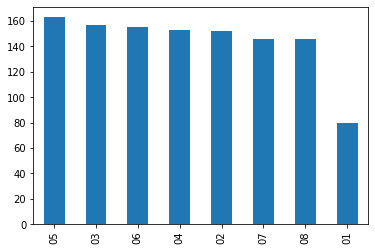

In [21]:
print(df_train['Emotion'].value_counts().plot(kind = 'bar'))
print(df_train['Emotion'].value_counts())

In [22]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
34,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.389558,0.398245,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.399281,0.389699,...,0.255694,0.254992,0.248605,0.245090,0.244835,0.244231,0.237988,0.227352,0.219585,0.239779,0.243523,0.235262,0.233824,0.252581,0.248772,0.205992,0.193439,0.205561,0.210814,0.220014,0.209358,0.206925,0.205911,0.214354,0.236086,0.237803,0.241088,0.250906,0.273132,0.289442,0.302013,0.306491,0.311840,0.336789,0.342861,0.354050,0.367048,0.382848,0.398803,04
1061,0.281012,0.291073,0.282084,0.295127,0.314061,0.308642,0.307832,0.310613,0.313802,0.321366,0.319525,0.316824,0.319579,0.319821,0.320011,0.324294,0.328645,0.331594,0.328189,0.331065,0.321237,0.294390,0.291736,0.312980,0.329807,0.329165,0.310522,0.300690,0.297933,0.294582,0.294394,0.291305,0.285224,0.282697,0.299068,0.298462,0.298051,0.315351,0.314132,0.308341,...,0.184129,0.182595,0.184709,0.188306,0.175224,0.161989,0.174275,0.169577,0.163095,0.170678,0.164363,0.170031,0.182998,0.202842,0.199898,0.188353,0.196642,0.188390,0.178496,0.181065,0.178938,0.177399,0.187764,0.195919,0.195315,0.189874,0.186701,0.190503,0.190991,0.199053,0.209390,0.213845,0.223476,0.234345,0.244203,0.263593,0.269587,0.276347,0.284674,01
1256,0.346512,0.347770,0.346126,0.346060,0.348519,0.348867,0.348867,0.348867,0.348867,0.348867,0.348867,0.347832,0.347564,0.348848,0.348024,0.344828,0.344008,0.349304,0.347454,0.350257,0.340629,0.334807,0.332299,0.334728,0.334192,0.339964,0.346341,0.341759,0.329083,0.329028,0.331782,0.301378,0.274117,0.292547,0.324820,0.343211,0.349067,0.348867,0.347365,0.346330,...,0.225289,0.241993,0.285090,0.295256,0.220047,0.201952,0.230992,0.245946,0.231569,0.236197,0.252934,0.256733,0.242415,0.229264,0.251130,0.262027,0.263805,0.274996,0.285909,0.257890,0.230587,0.223618,0.225383,0.243817,0.261248,0.273379,0.282767,0.284070,0.289008,0.292515,0.302558,0.316559,0.325801,0.325770,0.320886,0.332147,0.339966,0.333304,0.321931,08
333,0.363476,0.363476,0.363476,0.363476,0.363538,0.363932,0.361868,0.361764,0.358804,0.358937,0.353639,0.352505,0.350572,0.341629,0.324871,0.321989,0.325917,0.335107,0.347720,0.349917,0.352680,0.358324,0.363172,0.363032,0.356884,0.354720,0.355361,0.359080,0.362850,0.363569,0.363733,0.362736,0.363069,0.363476,0.363476,0.362738,0.362323,0.359984,0.345648,0.322811,...,0.218984,0.188030,0.164848,0.177386,0.205060,0.217366,0.218198,0.227600,0.235602,0.220898,0.219769,0.224344,0.209413,0.197309,0.182906,0.183431,0.189927,0.185162,0.181664,0.191859,0.183472,0.185890,0.205319,0.225691,0.250518,0.278992,0.288962,0.287158,0.291901,0.305468,0.290706,0.286265,0.301059,0.312565,0.311295,0.298180,0.280477,0.281248,0.288152,08
141,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.325309,0.297100,0.291094,0.301440,0.300601,0.292814,0.290658,0.302131,0.320457,0.344740,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.354416,0.344940,0.326570,0.295000,0.272125,0.269820,0.283467,0.293442,0.283371,0.280407,0.298848,0.322340,0.315026,...,0.253813,0.242486,0.243032,0.242325,0.215316,0.211393,0.222606,0.237674,0.234926,0.231268,0.214753,0.209447,0.210276,0.239614,0.254997,0.268551,0.271327,0.284723,0.279916,0.261416,0.243671,0.233174,0.215797,0.198656,0.197077,0.188099,0.188706,0.189707,0.208447,0.220071,0.229983,0.250709,0.276517,0.285106,0.318015,0.320472,0.308504,0.320303,0.325975,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

07    46
08    46
02    40
04    39
06    37
03    35
05    29
01    16
Name: Emotion, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


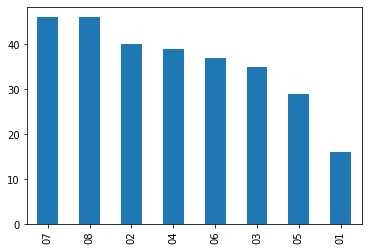

In [23]:
print(df_test['Emotion'].value_counts())
print(df_test['Emotion'].value_counts().plot(kind = 'bar'))

In [24]:
y_train=df_train['Emotion']
x_train=df_train.drop('Emotion',axis=1)

In [25]:
y_test=df_test['Emotion']
x_test=df_test.drop('Emotion',axis=1)

In [26]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
x_train=x_train.to_numpy()

In [27]:
Y_train=np.zeros((x_train.shape[0],8))
for i in range(y_train.shape[0]):
  Y_train[i][int(y_train[i])-1]=1

In [28]:
Y_test=np.zeros((x_test.shape[0],8))
for i in range(y_test.shape[0]):
  Y_test[i][int(y_test[i])-1]=1

In [29]:
y_train=Y_train
y_test=Y_test
y_train.shape

(1152, 8)

In [30]:
x_train.shape

(1152, 127)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Dropout

# **SIMPLE NEURAL NETWORK MODELS**

# MODEL 1

In [32]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model2=Sequential()
model2.add(Dense(130,activation='relu'))
model2.add(Dense(96,activation='relu'))
model2.add(Dense(72,activation='relu'))
model2.add(Dense(56,activation='relu'))
model2.add(Dense(8,activation='softmax'))
model2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [33]:
model2.fit(x_train,y_train,epochs=400,batch_size=10)

Epoch 1/400
116/116 [==============================] - 1s 2ms/step - loss: 2.0749 - accuracy: 0.1476
Epoch 2/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0673 - accuracy: 0.1311
Epoch 3/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0546 - accuracy: 0.1510
Epoch 4/400
116/116 [==============================] - 0s 3ms/step - loss: 2.0446 - accuracy: 0.1979
Epoch 5/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0245 - accuracy: 0.1892
Epoch 6/400
116/116 [==============================] - 0s 2ms/step - loss: 1.9882 - accuracy: 0.2118
Epoch 7/400
116/116 [==============================] - 0s 3ms/step - loss: 1.9744 - accuracy: 0.2274
Epoch 8/400
116/116 [==============================] - 0s 3ms/step - loss: 1.9296 - accuracy: 0.2604
Epoch 9/400
116/116 [==============================] - 0s 3ms/step - loss: 1.9192 - accuracy: 0.2465
Epoch 10/400
116/116 [==============================] - 0s 2ms/step - loss: 1.8964 - accura

In [34]:
model2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4.3089 - accuracy: 0.2743


[4.308920383453369, 0.2743055522441864]

## Graphical Representation

In [35]:
b=model2.predict(x_test)

In [36]:
ls=[]
for i in b:
  ls.append(np.argmax(i)+1)
print(ls)

[8, 4, 8, 4, 1, 7, 6, 8, 4, 5, 2, 7, 4, 8, 3, 4, 8, 7, 7, 3, 1, 6, 8, 3, 5, 4, 5, 4, 6, 6, 8, 8, 1, 4, 2, 8, 7, 6, 3, 6, 7, 7, 3, 1, 6, 6, 3, 2, 2, 8, 8, 8, 2, 4, 2, 1, 8, 8, 2, 3, 2, 2, 2, 6, 1, 7, 3, 7, 5, 6, 2, 2, 8, 1, 6, 2, 6, 3, 8, 5, 6, 2, 4, 8, 7, 5, 5, 2, 7, 5, 7, 6, 5, 5, 6, 4, 2, 2, 7, 3, 3, 3, 5, 2, 7, 1, 7, 4, 7, 4, 7, 7, 5, 4, 4, 3, 8, 5, 1, 6, 5, 5, 5, 7, 5, 8, 3, 5, 4, 2, 7, 3, 8, 1, 8, 8, 7, 1, 8, 2, 5, 3, 4, 5, 1, 4, 7, 5, 2, 3, 5, 3, 1, 5, 8, 1, 7, 7, 2, 4, 4, 5, 6, 1, 8, 8, 4, 8, 7, 1, 8, 6, 1, 4, 4, 6, 3, 8, 4, 5, 5, 2, 7, 1, 8, 8, 6, 3, 5, 6, 5, 4, 3, 6, 8, 4, 3, 8, 8, 8, 2, 7, 8, 2, 6, 2, 5, 2, 5, 4, 1, 4, 5, 7, 1, 3, 6, 2, 2, 4, 7, 1, 4, 5, 5, 2, 5, 5, 2, 8, 1, 8, 4, 4, 7, 8, 2, 5, 2, 2, 3, 7, 8, 2, 4, 1, 2, 7, 2, 7, 4, 2, 8, 6, 7, 8, 8, 5, 6, 2, 7, 2, 2, 2, 3, 1, 3, 8, 7, 8, 3, 1, 6, 6, 2, 7, 1, 7, 2, 8, 6, 4, 2, 3, 7, 2, 5, 1]


In [37]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[4, 1, 8, 8, 7, 3, 5, 6, 3, 7, 5, 7, 2, 1, 3, 3, 8, 8, 8, 8, 2, 3, 8, 5, 1, 3, 4, 4, 8, 8, 8, 3, 4, 2, 5, 6, 2, 6, 7, 3, 8, 7, 8, 3, 6, 8, 8, 8, 8, 6, 7, 8, 2, 4, 2, 8, 6, 3, 5, 3, 2, 7, 3, 3, 3, 5, 8, 3, 5, 6, 8, 7, 8, 4, 6, 2, 6, 2, 5, 5, 6, 7, 4, 8, 2, 5, 8, 7, 5, 2, 7, 1, 7, 6, 8, 6, 3, 4, 2, 5, 1, 2, 4, 4, 8, 4, 7, 8, 7, 8, 7, 7, 8, 2, 3, 7, 8, 8, 2, 5, 5, 8, 5, 4, 5, 4, 7, 1, 6, 2, 6, 5, 4, 5, 6, 8, 7, 4, 7, 6, 3, 2, 1, 4, 2, 2, 2, 6, 7, 4, 2, 7, 6, 6, 5, 3, 4, 6, 1, 1, 5, 7, 6, 6, 2, 4, 2, 8, 7, 3, 3, 6, 7, 7, 6, 6, 3, 5, 4, 7, 7, 1, 2, 4, 3, 8, 3, 3, 4, 3, 6, 7, 6, 7, 8, 4, 5, 8, 8, 3, 2, 3, 6, 6, 5, 2, 5, 2, 5, 1, 2, 8, 5, 4, 8, 3, 7, 2, 2, 4, 7, 8, 4, 7, 5, 7, 6, 4, 7, 8, 1, 4, 6, 3, 4, 2, 8, 6, 2, 7, 3, 4, 7, 7, 8, 7, 2, 3, 2, 4, 3, 4, 8, 1, 7, 7, 2, 5, 6, 4, 2, 2, 1, 4, 6, 7, 4, 7, 4, 4, 2, 8, 5, 6, 1, 8, 4, 7, 2, 6, 2, 1, 3, 6, 4, 7, 3, 7]


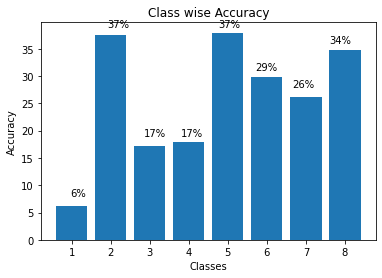

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

## MODEL 2

In [39]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=sqrt(Ni,No)
model3=Sequential()
model3.add(Dense(130,activation='tanh'))
model3.add(Dense(32,activation='tanh'))
model3.add(Dense(16,activation='tanh'))
model3.add(Dense(12,activation='tanh'))
model3.add(Dense(8,activation='softmax'))
model3.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [40]:
model3.fit(x_train,y_train,epochs=600,batch_size=10)

Epoch 1/600
116/116 [==============================] - 1s 2ms/step - loss: 2.0724 - accuracy: 0.1276
Epoch 2/600
116/116 [==============================] - 0s 2ms/step - loss: 2.0452 - accuracy: 0.1858
Epoch 3/600
116/116 [==============================] - 0s 2ms/step - loss: 2.0159 - accuracy: 0.1884
Epoch 4/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9763 - accuracy: 0.2231
Epoch 5/600
116/116 [==============================] - 0s 2ms/step - loss: 1.9573 - accuracy: 0.2300
Epoch 6/600
116/116 [==============================] - 0s 2ms/step - loss: 1.9335 - accuracy: 0.2292
Epoch 7/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9181 - accuracy: 0.2543
Epoch 8/600
116/116 [==============================] - 0s 2ms/step - loss: 1.9091 - accuracy: 0.2370
Epoch 9/600
116/116 [==============================] - 0s 2ms/step - loss: 1.9058 - accuracy: 0.2552
Epoch 10/600
116/116 [==============================] - 0s 2ms/step - loss: 1.9045 - accura

In [41]:
model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3.4620 - accuracy: 0.2674


[3.462019205093384, 0.2673611044883728]

## Graphical Representation

In [42]:
b=model3.predict(x_test)

In [43]:
ls=[]
for i in b:
  ls.append(np.argmax(i)+1)
print(ls)

[2, 7, 8, 8, 3, 6, 5, 4, 4, 8, 2, 4, 2, 3, 5, 3, 6, 8, 8, 4, 1, 6, 1, 4, 3, 3, 3, 4, 6, 3, 1, 8, 6, 4, 7, 3, 2, 6, 7, 7, 6, 7, 3, 8, 5, 8, 8, 5, 3, 8, 8, 8, 8, 4, 2, 1, 3, 6, 2, 7, 2, 7, 4, 6, 1, 3, 6, 2, 5, 7, 1, 4, 8, 6, 6, 2, 8, 3, 5, 5, 3, 2, 2, 4, 7, 5, 8, 7, 7, 5, 5, 4, 6, 5, 6, 2, 2, 1, 2, 6, 8, 5, 4, 8, 7, 1, 7, 3, 7, 8, 7, 6, 3, 3, 1, 7, 8, 3, 4, 3, 5, 8, 5, 1, 5, 6, 4, 7, 8, 2, 5, 8, 6, 1, 5, 6, 5, 4, 6, 4, 2, 8, 4, 3, 1, 6, 4, 5, 1, 4, 5, 3, 2, 5, 3, 2, 7, 7, 3, 3, 4, 7, 6, 6, 1, 2, 4, 6, 7, 3, 8, 6, 2, 2, 3, 6, 3, 5, 4, 7, 3, 2, 7, 6, 8, 7, 6, 2, 3, 6, 3, 8, 3, 8, 8, 3, 4, 8, 3, 8, 5, 7, 8, 4, 6, 6, 5, 2, 5, 8, 1, 3, 6, 7, 1, 3, 5, 4, 3, 3, 8, 6, 8, 5, 6, 8, 8, 8, 1, 3, 8, 4, 3, 4, 6, 8, 6, 7, 2, 1, 1, 7, 8, 4, 1, 7, 7, 7, 7, 4, 7, 4, 8, 6, 4, 4, 1, 5, 5, 4, 4, 8, 2, 4, 3, 3, 8, 6, 7, 6, 4, 8, 5, 6, 1, 2, 1, 7, 2, 8, 4, 8, 1, 3, 7, 5, 3, 4]


In [44]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[4, 1, 8, 8, 7, 3, 5, 6, 3, 7, 5, 7, 2, 1, 3, 3, 8, 8, 8, 8, 2, 3, 8, 5, 1, 3, 4, 4, 8, 8, 8, 3, 4, 2, 5, 6, 2, 6, 7, 3, 8, 7, 8, 3, 6, 8, 8, 8, 8, 6, 7, 8, 2, 4, 2, 8, 6, 3, 5, 3, 2, 7, 3, 3, 3, 5, 8, 3, 5, 6, 8, 7, 8, 4, 6, 2, 6, 2, 5, 5, 6, 7, 4, 8, 2, 5, 8, 7, 5, 2, 7, 1, 7, 6, 8, 6, 3, 4, 2, 5, 1, 2, 4, 4, 8, 4, 7, 8, 7, 8, 7, 7, 8, 2, 3, 7, 8, 8, 2, 5, 5, 8, 5, 4, 5, 4, 7, 1, 6, 2, 6, 5, 4, 5, 6, 8, 7, 4, 7, 6, 3, 2, 1, 4, 2, 2, 2, 6, 7, 4, 2, 7, 6, 6, 5, 3, 4, 6, 1, 1, 5, 7, 6, 6, 2, 4, 2, 8, 7, 3, 3, 6, 7, 7, 6, 6, 3, 5, 4, 7, 7, 1, 2, 4, 3, 8, 3, 3, 4, 3, 6, 7, 6, 7, 8, 4, 5, 8, 8, 3, 2, 3, 6, 6, 5, 2, 5, 2, 5, 1, 2, 8, 5, 4, 8, 3, 7, 2, 2, 4, 7, 8, 4, 7, 5, 7, 6, 4, 7, 8, 1, 4, 6, 3, 4, 2, 8, 6, 2, 7, 3, 4, 7, 7, 8, 7, 2, 3, 2, 4, 3, 4, 8, 1, 7, 7, 2, 5, 6, 4, 2, 2, 1, 4, 6, 7, 4, 7, 4, 4, 2, 8, 5, 6, 1, 8, 4, 7, 2, 6, 2, 1, 3, 6, 4, 7, 3, 7]


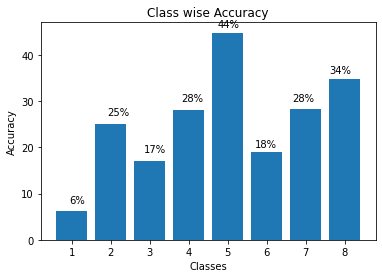

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

# **BLSTM MODEL**

Reshaping input coz BLSTM requires 3-D input

In [46]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#x_train=x_train.reshape(576,1,130)
#x_test=x_test.reshape(144,1,130)

## Model 1

In [47]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model=Sequential()
model.add(Bidirectional(LSTM(130, return_sequences=True,activation='tanh')))
model.add(Bidirectional(LSTM(96, return_sequences=True, activation='tanh')))
#model.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(72,activation='tanh',dropout=0.2)))
model.add(Dense(8, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [48]:
model.fit(x=x_train,y=y_train,epochs=100,batch_size=10) 

Epoch 1/100
116/116 [==============================] - 75s 520ms/step - loss: 2.0821 - accuracy: 0.1554
Epoch 2/100
116/116 [==============================] - 59s 512ms/step - loss: 2.0277 - accuracy: 0.1936
Epoch 3/100
116/116 [==============================] - 60s 519ms/step - loss: 1.9730 - accuracy: 0.2378
Epoch 4/100
116/116 [==============================] - 60s 513ms/step - loss: 1.9428 - accuracy: 0.2526
Epoch 5/100
116/116 [==============================] - 59s 511ms/step - loss: 1.9545 - accuracy: 0.2457
Epoch 6/100
116/116 [==============================] - 60s 519ms/step - loss: 1.9529 - accuracy: 0.2335
Epoch 7/100
116/116 [==============================] - 60s 515ms/step - loss: 1.9173 - accuracy: 0.2630
Epoch 8/100
116/116 [==============================] - 60s 517ms/step - loss: 1.9003 - accuracy: 0.2613
Epoch 9/100
116/116 [==============================] - 59s 512ms/step - loss: 1.8842 - accuracy: 0.2648
Epoch 10/100
116/116 [==============================] - 59s 509m

In [49]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 4s 196ms/step - loss: 2.8711 - accuracy: 0.3299


[2.8711061477661133, 0.3298611044883728]

## **Graphical representation**

In [50]:
a=model.predict(x_test)

In [51]:
ls=[]
for i in a:
  ls.append(np.argmax(i)+1)
print(ls)

[4, 7, 8, 3, 8, 8, 8, 2, 4, 7, 2, 7, 3, 4, 3, 8, 4, 5, 8, 1, 1, 1, 8, 7, 4, 8, 5, 7, 3, 1, 4, 6, 1, 2, 7, 8, 1, 3, 2, 7, 8, 4, 8, 7, 3, 8, 3, 8, 7, 1, 3, 3, 8, 3, 6, 4, 8, 8, 7, 7, 2, 2, 7, 3, 1, 7, 8, 3, 5, 3, 8, 4, 1, 6, 6, 2, 6, 4, 5, 5, 5, 7, 2, 8, 7, 7, 6, 7, 7, 2, 5, 2, 4, 8, 8, 4, 3, 3, 2, 7, 1, 5, 7, 2, 7, 2, 7, 2, 7, 3, 7, 6, 8, 4, 1, 7, 3, 6, 7, 5, 5, 8, 5, 2, 6, 1, 5, 2, 4, 3, 7, 5, 1, 5, 4, 6, 2, 2, 7, 8, 8, 6, 2, 7, 1, 2, 4, 6, 7, 4, 5, 4, 7, 7, 7, 7, 4, 7, 8, 2, 4, 5, 6, 6, 4, 7, 2, 8, 4, 6, 8, 6, 1, 2, 1, 3, 3, 7, 4, 4, 7, 4, 2, 3, 3, 4, 8, 3, 4, 3, 3, 7, 5, 6, 1, 4, 5, 1, 8, 1, 7, 4, 4, 8, 7, 2, 5, 2, 5, 3, 2, 8, 5, 6, 8, 1, 6, 1, 2, 2, 7, 7, 7, 7, 6, 3, 8, 2, 6, 5, 1, 7, 8, 7, 7, 6, 8, 6, 2, 1, 4, 7, 7, 7, 5, 7, 2, 8, 6, 1, 7, 2, 8, 4, 3, 2, 2, 5, 7, 4, 7, 4, 7, 4, 6, 3, 4, 4, 7, 8, 5, 1, 6, 6, 7, 3, 2, 2, 2, 2, 7, 4, 6, 7, 7, 7, 3, 5]


In [52]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[4, 1, 8, 8, 7, 3, 5, 6, 3, 7, 5, 7, 2, 1, 3, 3, 8, 8, 8, 8, 2, 3, 8, 5, 1, 3, 4, 4, 8, 8, 8, 3, 4, 2, 5, 6, 2, 6, 7, 3, 8, 7, 8, 3, 6, 8, 8, 8, 8, 6, 7, 8, 2, 4, 2, 8, 6, 3, 5, 3, 2, 7, 3, 3, 3, 5, 8, 3, 5, 6, 8, 7, 8, 4, 6, 2, 6, 2, 5, 5, 6, 7, 4, 8, 2, 5, 8, 7, 5, 2, 7, 1, 7, 6, 8, 6, 3, 4, 2, 5, 1, 2, 4, 4, 8, 4, 7, 8, 7, 8, 7, 7, 8, 2, 3, 7, 8, 8, 2, 5, 5, 8, 5, 4, 5, 4, 7, 1, 6, 2, 6, 5, 4, 5, 6, 8, 7, 4, 7, 6, 3, 2, 1, 4, 2, 2, 2, 6, 7, 4, 2, 7, 6, 6, 5, 3, 4, 6, 1, 1, 5, 7, 6, 6, 2, 4, 2, 8, 7, 3, 3, 6, 7, 7, 6, 6, 3, 5, 4, 7, 7, 1, 2, 4, 3, 8, 3, 3, 4, 3, 6, 7, 6, 7, 8, 4, 5, 8, 8, 3, 2, 3, 6, 6, 5, 2, 5, 2, 5, 1, 2, 8, 5, 4, 8, 3, 7, 2, 2, 4, 7, 8, 4, 7, 5, 7, 6, 4, 7, 8, 1, 4, 6, 3, 4, 2, 8, 6, 2, 7, 3, 4, 7, 7, 8, 7, 2, 3, 2, 4, 3, 4, 8, 1, 7, 7, 2, 5, 6, 4, 2, 2, 1, 4, 6, 7, 4, 7, 4, 4, 2, 8, 5, 6, 1, 8, 4, 7, 2, 6, 2, 1, 3, 6, 4, 7, 3, 7]


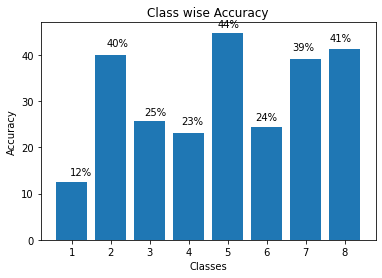

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

## BLSTM MODEL 2 combination of blstm and SNN

In [54]:
##This is not good, never try
model4=Sequential()
model4.add(Bidirectional(LSTM(130,return_sequences=True,activation='tanh')))
model4.add(Bidirectional(LSTM(96,return_sequences=True,activation='tanh')))
#model4.add(Bidirectional(LSTM(72,return_sequences=True,activation='tanh')))
#model4.add(Bidirectional(LSTM(56,return_sequences=True,activation='tanh')))
model4.add(Bidirectional(LSTM(72, activation='tanh')))
#model4.add(Dense(72,activation='tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(56,activation='tanh'))
model4.add(Dense(46,activation='tanh'))
#model4.add(Dense(38,activation='tanh'))
#model4.add(Dense(33,activation='tanh'))
#model4.add(Dense(30,activation='tanh'))
#model4.add(Dense(28,activation='tanh'))
#model4.add(Dense(27,activation='tanh'))
#model4.add(Dense(26,activation='tanh'))
#model4.add(Dense(25,activation='tanh'))
#model4.add(Dropout(0.2))
model4.add(Dense(8, activation='softmax'))
model4.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [55]:
model4.fit(x=x_train,y=y_train,epochs=100,batch_size=10) 

Epoch 1/100
116/116 [==============================] - 73s 508ms/step - loss: 2.0785 - accuracy: 0.1380
Epoch 2/100
116/116 [==============================] - 59s 509ms/step - loss: 2.0739 - accuracy: 0.1736
Epoch 3/100
116/116 [==============================] - 58s 503ms/step - loss: 2.0036 - accuracy: 0.2127
Epoch 4/100
116/116 [==============================] - 59s 508ms/step - loss: 1.9549 - accuracy: 0.2483
Epoch 5/100
116/116 [==============================] - 59s 510ms/step - loss: 1.9427 - accuracy: 0.2491
Epoch 6/100
116/116 [==============================] - 59s 506ms/step - loss: 1.9297 - accuracy: 0.2370
Epoch 7/100
116/116 [==============================] - 59s 506ms/step - loss: 1.9160 - accuracy: 0.2665
Epoch 8/100
116/116 [==============================] - 59s 505ms/step - loss: 1.9016 - accuracy: 0.2726
Epoch 9/100
116/116 [==============================] - 57s 494ms/step - loss: 1.8990 - accuracy: 0.2700
Epoch 10/100
116/116 [==============================] - 59s 512m

In [56]:
model4.evaluate(x_test,y_test)

9/9 [==============================] - 5s 200ms/step - loss: 2.6478 - accuracy: 0.3507


[2.6478333473205566, 0.3506944477558136]

[2, 6, 3, 5, 3, 3, 4, 7, 7, 7, 6, 7, 3, 5, 3, 5, 2, 7, 3, 4, 3, 8, 3, 5, 4, 3, 6, 4, 6, 8, 8, 5, 5, 4, 5, 8, 2, 3, 4, 5, 6, 7, 5, 5, 5, 8, 3, 3, 3, 1, 8, 8, 2, 3, 2, 1, 5, 6, 7, 3, 2, 7, 7, 3, 4, 7, 8, 3, 3, 6, 7, 1, 8, 4, 6, 2, 6, 7, 6, 5, 6, 6, 2, 6, 7, 3, 8, 7, 7, 2, 7, 4, 3, 3, 6, 2, 4, 6, 2, 7, 1, 4, 7, 2, 7, 1, 2, 4, 7, 5, 4, 7, 8, 7, 1, 7, 3, 8, 3, 5, 5, 3, 5, 2, 6, 4, 3, 2, 6, 2, 3, 5, 1, 5, 3, 8, 7, 4, 4, 6, 5, 7, 7, 4, 2, 2, 1, 6, 4, 4, 1, 4, 3, 5, 4, 3, 7, 7, 8, 7, 3, 7, 6, 6, 1, 5, 2, 8, 7, 6, 8, 6, 3, 2, 3, 6, 6, 5, 1, 4, 5, 4, 2, 3, 3, 3, 3, 6, 7, 3, 7, 3, 3, 6, 1, 1, 5, 1, 8, 3, 4, 7, 8, 8, 5, 2, 5, 2, 5, 6, 3, 3, 6, 4, 1, 5, 7, 4, 2, 3, 8, 6, 7, 3, 5, 4, 3, 6, 5, 5, 1, 1, 1, 7, 1, 3, 3, 4, 2, 1, 2, 5, 2, 4, 5, 4, 7, 8, 4, 8, 8, 4, 8, 1, 3, 4, 1, 5, 7, 2, 7, 2, 5, 6, 6, 7, 7, 7, 7, 3, 2, 1, 6, 6, 7, 3, 3, 7, 2, 8, 2, 1, 1, 3, 2, 7, 8, 4]
[4, 1, 8, 8, 7, 3, 5, 6, 3, 7, 5, 7, 2, 1, 3, 3, 8, 8, 8, 8, 2, 3, 8, 5, 1, 3, 4, 4, 8, 8, 8, 3, 4, 2, 5, 6, 2, 6, 7, 3, 8, 7, 8, 3, 6,

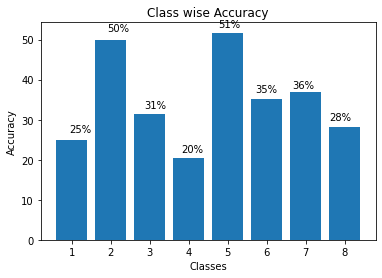

In [57]:
a=model4.predict(x_test)
ls=[]
for i in a:
  ls.append(np.argmax(i)+1)
print(ls)
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

# **BLSTM MODEL WITH** different input shape

In [58]:
x_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [59]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model5=Sequential()
model5.add(Bidirectional(LSTM(130, return_sequences=True,activation='tanh')))
model5.add(Bidirectional(LSTM(96, return_sequences=True, activation='tanh')))
#model5.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh')))
#model5.add(Bidirectional(LSTM(56, return_sequences=True, activation='tanh')))
model5.add(Bidirectional(LSTM(72,activation='tanh')))
model5.add(Dense(8, activation='softmax'))
model5.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [60]:
model5.fit(x_train,y_train,batch_size=10,epochs=173)

Epoch 1/173
116/116 [==============================] - 16s 17ms/step - loss: 2.0737 - accuracy: 0.1345
Epoch 2/173
116/116 [==============================] - 2s 15ms/step - loss: 2.0641 - accuracy: 0.1667
Epoch 3/173
116/116 [==============================] - 2s 18ms/step - loss: 2.0066 - accuracy: 0.1884
Epoch 4/173
116/116 [==============================] - 2s 19ms/step - loss: 1.9435 - accuracy: 0.2413
Epoch 5/173
116/116 [==============================] - 2s 19ms/step - loss: 1.9141 - accuracy: 0.2457
Epoch 6/173
116/116 [==============================] - 2s 19ms/step - loss: 1.9016 - accuracy: 0.2526
Epoch 7/173
116/116 [==============================] - 2s 17ms/step - loss: 1.8865 - accuracy: 0.2595
Epoch 8/173
116/116 [==============================] - 2s 19ms/step - loss: 1.8801 - accuracy: 0.2595
Epoch 9/173
116/116 [==============================] - 2s 19ms/step - loss: 1.8856 - accuracy: 0.2604
Epoch 10/173
116/116 [==============================] - 2s 17ms/step - loss: 1.86

In [61]:
model5.evaluate(x_test,y_test)

9/9 [==============================] - 2s 5ms/step - loss: 3.1439 - accuracy: 0.3194


[3.1438863277435303, 0.3194444477558136]

## Graphical Representation

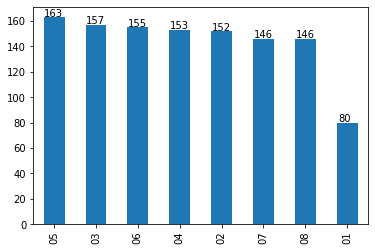

In [62]:
ax=df_train['Emotion'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [63]:
import wave
from pylab import *

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Waveform')

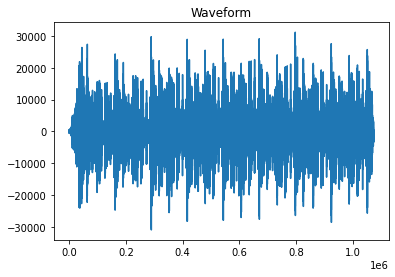

In [65]:
spf = wave.open('file_example_WAV_2MG.wav','r')
sound_info = spf.readframes(nframes=-1)
sound_info = frombuffer(sound_info, 'Int16')
plot(sound_info)
title('Waveform')


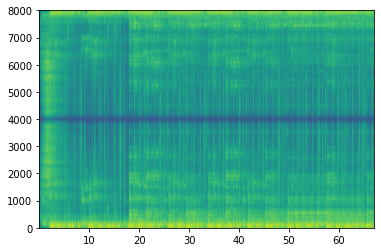

In [66]:
f = spf.getframerate()
spectrogram = specgram(sound_info, Fs = f, scale_by_freq=True,sides='default') 
show()
